In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyabc

import os
import seaborn as sns


font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
from matplotlib import rc
rc('font', **font)

In [2]:
psize=1000
wsize=1536
version=3
history_DLA=pyabc.History("sqlite:///" +
                          os.path.join("/home/felipe/testresults/Tumor",
                                       "TumorP"+str(psize)+"W"+str(wsize)+"DYNLA"+str(version)+".db"))

history_ORI=pyabc.History("sqlite:///" +
                          os.path.join("/home/felipe/testresults/Tumor",
                                       "TumorP"+str(psize)+"W"+str(wsize)+"ORI"+str(version)+".db"))

path = "/home/felipe/GitBackUps/Testresults/TumorModel/"+str(psize)+"_"+str(wsize)+"/Run"+str(version)
history_DLA.get_all_populations().to_csv(path+"/Tumor"+str(psize)+"AllPopLA.csv")
history_ORI.get_all_populations().to_csv(path+"/Tumor"+str(psize)+"AllPopOri.csv")

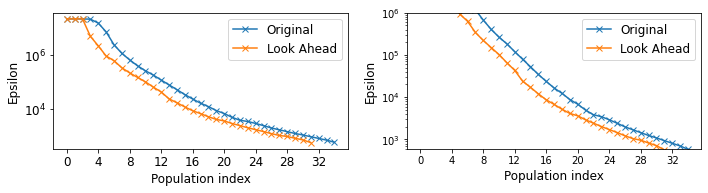

In [3]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

pyabc.visualization.plot_epsilons([history_ORI, history_DLA], labels=["Original", "Look Ahead"], ax=ax[0])
ax[0].set_title(None)


pyabc.visualization.plot_epsilons([history_ORI, history_DLA], labels=["Original", "Look Ahead"], ax=ax[1])
ax[1].set_yscale("log")
ax[1].set_ylim(ymin=600,ymax=1000000)
ax[1].set_title(None)
ax[1].tick_params(axis='both', which='major', labelsize=10)
#pyabc.visualization.plot_epsilons([history_DLA, history_ORI], labels=["DYNLA", "ORI"], ax=ax[2])
#ax[2].set_yscale("log")
#ax[2].set_ylim(ymin=600,ymax=10000)

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"Epsilons"+str(version)+".pdf")

In [4]:
"""limits = dict(log_division_rate=(-3, -1),
              log_division_depth=(1, 3),
              log_initial_spheroid_radius=(0, 1.2),
              log_initial_quiescent_cell_fraction=(-5, 0),
              log_ecm_production_rate=(-5, 0),
              log_ecm_degradation_rate=(-5, 0),
              log_ecm_division_threshold=(-5, 0))


df, w = history_DLA.get_distribution(m=0, t=history_DLA.max_t)
pyabc.visualization.plot_kde_matrix(df, w, limits=limits);
"""

parameter_names=["log_division_depth",
                "log_division_rate",
                "log_ecm_degradation_rate",
                "log_ecm_division_threshold",
                "log_ecm_production_rate",
                "log_initial_quiescent_cell_fraction",
                "log_initial_spheroid_radius"]


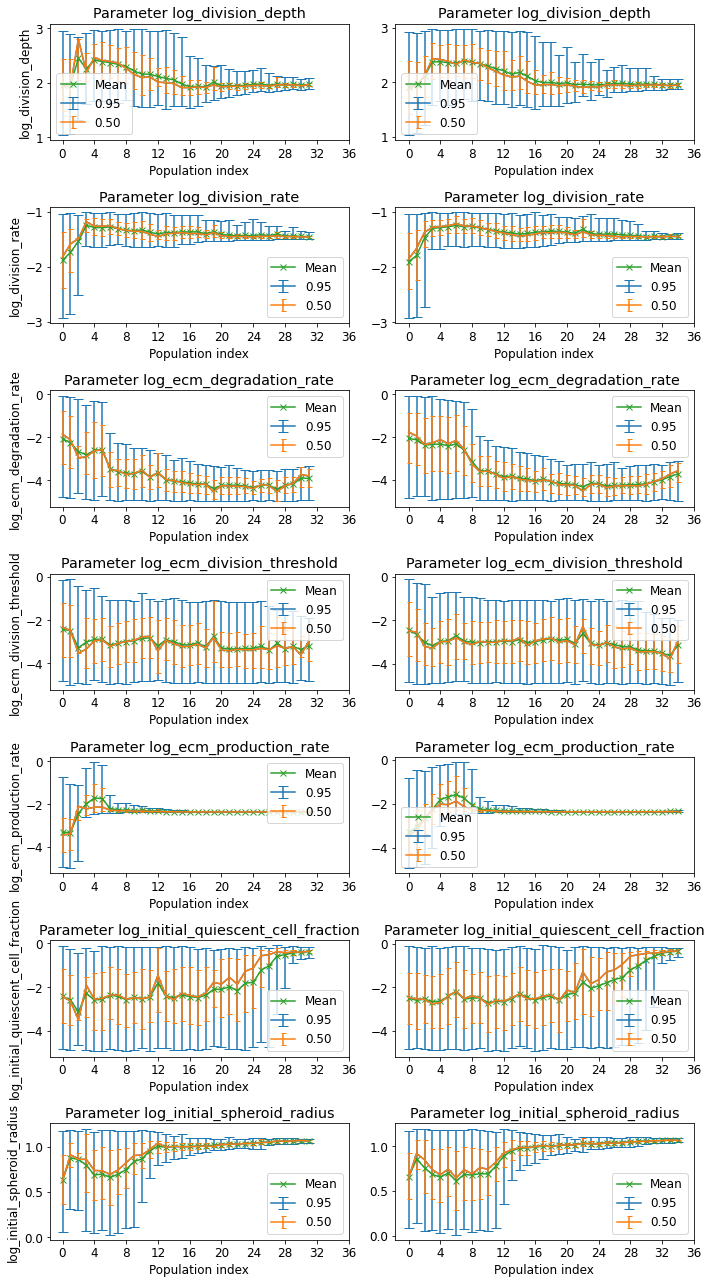

In [5]:
fig = plt.figure(figsize=(10,18))

xticks = [0]
i=0
while i < len(history_DLA.get_all_populations()):
    i=i+4
    xticks.append(i)

for i in range(0,len(parameter_names)):
    ax = fig.add_subplot(len(parameter_names),2, 2*i+1)
    
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")

    
    ax = fig.add_subplot(len(parameter_names),2, 2*i + 2)
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.95, 0.5], par_names=[parameter_names[i]],
    show_mean=True, arr_ax = ax)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_xlabel("Population index")
    ax.set_ylabel(None)

    
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"CredibleIntervals"+str(version)+".pdf")

35


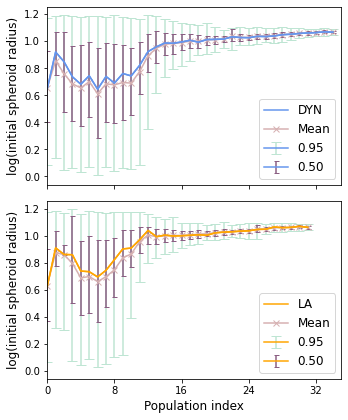

In [32]:
fig, axes = plt.subplots(2,1, figsize=(5, 6))

xticks = [0]
i=0
max_gen=max(len(history_DLA.get_all_populations()), len(history_ORI.get_all_populations()))-1
print(max_gen)

while i < max_gen-3:
    i=i+8
    xticks.append(i)

for i in [6]:
    
    ax = axes[0]
    ax.plot([0],[0],color='cornflowerblue', label='DYN')
    pyabc.visualization.plot_credible_intervals(
    history_ORI, levels=[0.95, 0.5], par_names=[parameter_names[i]],
        colors=['#8B5E83','#BEE5D3'], color_middle = 'cornflowerblue',
        show_mean=True, color_mean='#D6B0B1', arr_ax = ax)
    
    ax.set_xlabel(None)
    ax.set_title(None)
    #ax.set_title("Initial Spheroid Radius - DYN")
    ax.set_xlim(xmin=0,xmax=max_gen)
    ax.set_xticks(xticks)
    ax.set_ylabel("log(initial spheroid radius)")
    ax.set_xticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    ax = axes[1]
    ax.plot([0],[0],color='orange', label='LA')
    pyabc.visualization.plot_credible_intervals(
    history_DLA, levels=[0.95, 0.5], par_names=[parameter_names[i]],
        colors=['#8B5E83','#BEE5D3'], color_middle = 'orange',
        show_mean=True, color_mean = '#D6B0B1', arr_ax = ax)
    
    ax.set_title(None)
    #ax.set_title("Initial Spheroid Radius - LA")
    ax.set_xlim(xmin=0,xmax=max_gen)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_ylabel("log(initial spheroid radius)")
    ax.set_xlabel("Population index")
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.legend()
    
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"CI1Par"+str(version)+".pdf")

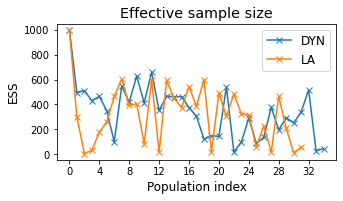

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

pyabc.visualization.plot_effective_sample_sizes([history_ORI, history_DLA], labels=["DYN", "LA"], ax=ax)
ax.tick_params(axis='both', which='major', labelsize=10)

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EffSampleSize"+str(version)+".pdf")

In [8]:
DLADF = history_DLA.get_all_populations()
starttime = DLADF["population_end_time"][0]

new_col=[]
for i in range(0,len(DLADF)):
    new_col.append((DLADF["population_end_time"][i]-DLADF["population_end_time"][0]).total_seconds())
DLADF.insert(2, "time_passed_s", new_col, True)


ORIDF = history_ORI.get_all_populations()
starttime = ORIDF["population_end_time"][0]

new_col=[]
for i in range(0,len(ORIDF)):
    new_col.append((ORIDF["population_end_time"][i]-ORIDF["population_end_time"][0]).total_seconds())
ORIDF.insert(2, "time_passed_s", new_col, True)


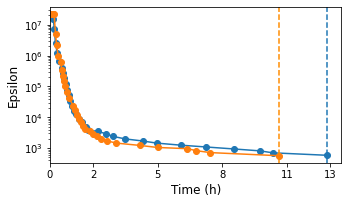

In [9]:
fig, axes = plt.subplots(1,1, figsize=(5,3))

ax = axes

ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "Original", marker="o")
ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "Look Ahead", marker="o")

ax.set_yscale("log")
ax.set_ylabel("Epsilon")
ax.set_xlabel("Time (h)")
ax.axvline(ORIDF["time_passed_s"].iloc[-1], linestyle='dashed')
ax.axvline(DLADF["time_passed_s"].iloc[-1], color='darkorange', linestyle='dashed')
ax.set_xlim(xmin=0)
xticklabels=[int(a/3600) for a in (ax.get_xticks())]
ax.set_xticks([a*3600 for a in xticklabels])
ax.set_xticklabels(xticklabels)
ax.tick_params(axis='both', which='major', labelsize=10)
fig.tight_layout()
fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EpsilonOverTime"+str(version)+".pdf")

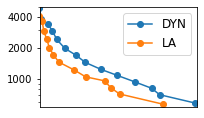

In [10]:
fig, axes = plt.subplots(1,1, figsize=(3,1.8))

ax = axes

ax.plot(ORIDF["time_passed_s"], ORIDF["epsilon"], label = "DYN", marker="o")
ax.plot(DLADF["time_passed_s"], DLADF["epsilon"], label = "LA", marker="o")

ax.set_yscale("log")

from matplotlib.ticker import NullFormatter
ax.yaxis.set_minor_formatter(NullFormatter())

ax.set_ylim(ymin=530, ymax=5000)
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
ax.set_ylabel(None)
yticks=[1000,2000,4000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlim(xmin=6000, xmax=47000)
ax.set_xlabel(None)
ax.set_xticks([])
ax.tick_params(axis='both', which='major', labelsize=10)

#box = ax.get_position()
#ax.set_position([box.x0+0.1*box.width, box.y0+0.1*box.height, 0.6*box.width, 0.6*box.height])

ax.legend()
fig.tight_layout()
fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"EpsilonOverTimeZoom"+str(version)+".pdf")

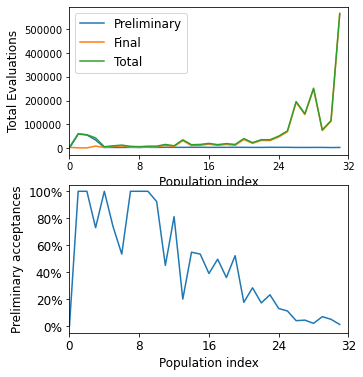

In [11]:
stat_df = pd.read_csv(path+"/TumorStats"+str(psize)+".csv")[1:]

fig, axes = plt.subplots(2,1, figsize=(5,6))


ax = axes[0]

ax.plot(stat_df['t'],stat_df['n_lookahead'], label="Preliminary")
ax.plot(stat_df['t'],stat_df['n_evaluated']-stat_df['n_lookahead'], label="Final")
ax.plot(stat_df['t'],stat_df['n_evaluated'], label="Total")

ax.set_ylabel("Total Evaluations")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend()


ax = axes[1]

n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/500
    
ax.plot(stat_df['t'], n_lookahead_particles)

ax.set_ylabel("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


plt.show()

ax.tick_params(axis='both', which='major', labelsize=10)
"""
ax = axes[2]

n_total_acceptances=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_total_acceptances[i]=max(stat_df['n_accepted'][i+1], stat_df['n_lookahead_accepted'][i+1])

ax.plot(stat_df['t'], stat_df['n_lookahead_accepted']/stat_df['n_lookahead'], label='look_ahead')
ax.plot(stat_df['t'], n_total_acceptances/stat_df['n_evaluated'], label='total')


ax.title.set_text("Acceptance rates")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.legend()
"""

fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"Acceptances"+str(version)+".pdf")

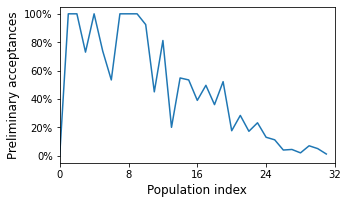

In [12]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

ax = ax

n_lookahead_particles=np.zeros(len(stat_df))
for i in range(len(stat_df)):
    n_lookahead_particles[i]=min(500, stat_df['n_lookahead_accepted'][i+1])/500
    
ax.plot(stat_df['t'], n_lookahead_particles)

ax.set_ylabel("Preliminary acceptances")
ax.set_xlim(xmin=0,xmax=len(stat_df))
ax.set_xlabel("Population index")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

ax.tick_params(axis='both', which='major', labelsize=10)
fig.tight_layout()

fig.savefig("/home/felipe/MTGraphics/Tumor/Tumor"+str(psize)+"PrelAccept"+str(version)+".pdf")